In [1]:
# We'll have 3D plotting and 2D band structure, so we need a handful of helper functions.
%run matplotlib_setup.ipy
%run helper.ipy
%run zigzag.ipy
%run sinx.ipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
graphene = kwant.lattice.general([[np.sqrt(3)/2,1/2],[np.sqrt(3)/2,-1/2]],  #Lattice vectors 
                                  [[0,0],[1/np.sqrt(3),0]])
GR = kwant.Builder(kwant.TranslationalSymmetry(*graphene.prim_vecs))

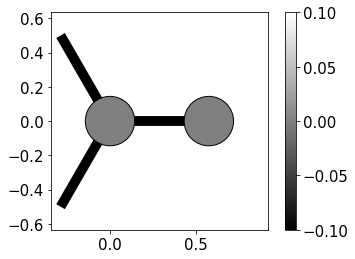

In [3]:
GR[graphene.shape((lambda pos: True),(0,0))] = 0
GR[graphene.neighbors(1)] =1 
kwant.plot(GR,site_color=same_color,site_lw=0.01);

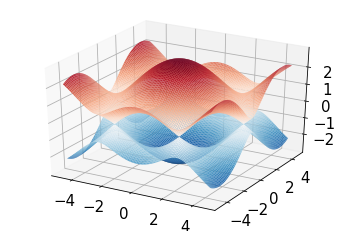

In [4]:
dispersion_2D(wraparound(GR).finalized())

In [5]:
Zigzag = kwant.lattice.general([[1,0],[0,np.sqrt(3)/3]], #Lattice vectors
                                     [[1/6,0],[2/6,np.sqrt(3)/2],[4/6,np.sqrt(3)/2],[5/6,0]])

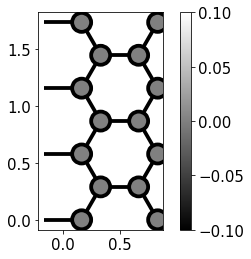

In [6]:
Z7 = make_1D_zigzag(N=7)
kwant.plot(Z7,site_color=same_color,site_lw=0.1);

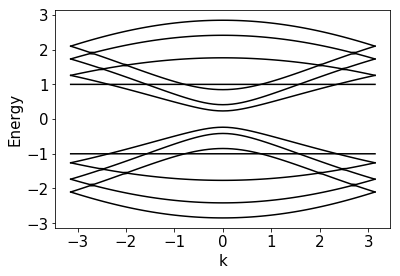

In [7]:
kwant.plotter.bands(Z7.finalized());

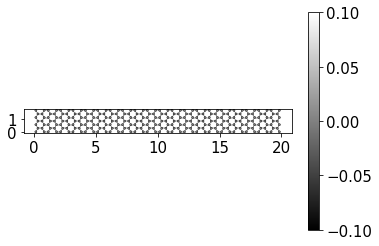

interactive(children=(IntSlider(value=130, description='i', max=150, min=130), Output()), _dom_classes=('widge…

In [8]:
Z7_finite = make_zigzag_ribbon(N=7,L=20)
Z7_finite = Z7_finite.finalized()
ham = Z7_finite.hamiltonian_submatrix()
kwant.plot(Z7_finite,site_color=same_color,site_lw=0.1)
mid_band = int(np.shape(ham)[-1]/2)
plot_wf_ribbon(Z7_finite,mid_band-10,mid_band+10,ham)

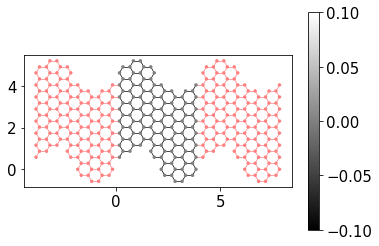

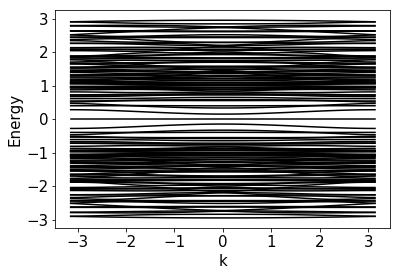

In [9]:
GNRsinx,sys = setup_sinx(N=16,L=16)
kwant.plot(sys,site_color=same_color,num_lead_cells=1);
GNRsinx = GNRsinx.finalized()
eig_val,eig_vecs = zak_bands(GNRsinx);

In [10]:
mid_band = int(np.shape(eig_vecs)[-1]/2)
GNRplot_sys = make_sinx_unit_cell(N=12,L=20,periodic=False)
plot_wf(sys.finalized(),mid_band-5,mid_band+5,eig_vecs[0],eig_val[0]);

interactive(children=(IntSlider(value=58, description='i', max=68, min=58), Output()), _dom_classes=('widget-i…